In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
sp500 = pd.read_csv("^GSPC_2000~2018.csv")

In [272]:
sp500.index = sp500.Date.map(lambda x : pd.Timestamp(x))
del sp500['Date']

In [273]:
del sp500['Adj Close']

In [274]:
sp500.Volume = sp500.Volume / 1e9

In [275]:
sp500['returnsCloseNext10'] = np.log(sp500['Close'].shift(-1) / sp500['Open'])

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
lr = LinearRegression()
rid = Ridge()
las = Lasso()
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [277]:
sp500.head()

,Open,High,Low,Close,Volume,returnsCloseNext10
Date,,,,,,
2000-12-04,1315.180054,1332.060059,1310.229980,1324.969971,1.1030,0.045600
2000-12-05,1324.969971,1376.560059,1324.969971,1376.540039,0.9003,0.019796
2000-12-06,1376.540039,1376.540039,1346.150024,1351.459961,1.3993,-0.024258
2000-12-07,1351.459961,1353.500000,1339.260010,1343.550049,1.1280,0.013545
2000-12-08,1343.550049,1380.329956,1343.550049,1369.890015,1.3583,0.026913


In [278]:
sp500["pct_change"] = sp500.Close.pct_change()
for i in range(3, 31, 2):
    sp500["close_ma_{}".format(i)] = \
      sp500.Close.rolling(window = i).mean()
for i in [7, 21, 30, 60, 90, 91, 100, 120]:
    sp500["his_vol_{}".format(i)] = \
      sp500["pct_change"].rolling(window = i).std()*(252**0.5)
for i in [1, 3, 5, 7, 10, 12, 14]:
    sp500['returnsCC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Close.shift(i))
    sp500['returnsOO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Open.shift(i))
    sp500['returnsCO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Close.shift(i))
    sp500['returnsOC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Open.shift(i))

In [279]:
sp500

,Open,High,Low,Close,Volume,returnsCloseNext10,pct_change,close_ma_3,close_ma_5,close_ma_7,...,returnsCO10,returnsOC10,returnsCC12,returnsOO12,returnsCO12,returnsOC12,returnsCC14,returnsOO14,returnsCO14,returnsOC14
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-04,1315.180054,1332.060059,1310.229980,1324.969971,1.10300,0.045600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-05,1324.969971,1376.560059,1324.969971,1376.540039,0.90030,0.019796,0.038922,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-06,1376.540039,1376.540039,1346.150024,1351.459961,1.39930,-0.024258,-0.018220,1350.989990,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-07,1351.459961,1353.500000,1339.260010,1343.550049,1.12800,0.013545,-0.005853,1357.183350,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-08,1343.550049,1380.329956,1343.550049,1369.890015,1.35830,0.026913,0.019605,1354.966675,1353.282007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-11,1369.890015,1389.050049,1364.140015,1380.199951,1.20240,0.000941,0.007526,1364.546672,1364.328003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-12,1380.199951,1380.270020,1370.270020,1371.180054,1.08340,-0.014751,-0.006535,1373.756673,1363.256006,1359.684291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-13,1371.180054,1385.819946,1358.479980,1359.989990,1.19510,-0.022308,-0.008161,1370.456665,1364.962012,1364.687151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-14,1359.989990,1359.989990,1340.479980,1340.930054,1.06130,-0.035810,-0.014015,1357.366699,1364.438013,1359.600011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
# spy = sp500.loc['2013-07-01':'2018-07-01']
train = sp500.loc['2005-01-01':'2016-01-01']
test = sp500.loc['2016-01-01':]

In [281]:
train.head()

,Open,High,Low,Close,Volume,returnsCloseNext10,pct_change,close_ma_3,close_ma_5,close_ma_7,...,returnsCO10,returnsOC10,returnsCC12,returnsOO12,returnsCO12,returnsOC12,returnsCC14,returnsOO14,returnsCO14,returnsOC14
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1.5108,-0.019893,-0.008119,1209.183350,1210.908008,1209.941441,...,0.014729,-0.000940,-0.003024,0.007072,0.005129,-0.001081,0.002832,0.019935,0.010985,0.011782
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1.7210,-0.015374,-0.011671,1200.683350,1205.810010,1206.787162,...,0.006200,-0.005163,-0.012680,-0.003024,-0.000940,-0.014764,-0.012821,0.002832,-0.001081,-0.008908
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1.7389,-0.000135,-0.003628,1191.289998,1199.868018,1203.761440,...,-0.014540,-0.009174,-0.008798,-0.012680,-0.005163,-0.016314,-0.018398,-0.012821,-0.014764,-0.016455
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1.5691,0.002068,0.003506,1186.560018,1194.736011,1200.097151,...,-0.021586,-0.014674,-0.005675,-0.008798,-0.009174,-0.005298,-0.012814,-0.018398,-0.016314,-0.014898
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1.4779,0.001985,-0.001431,1185.939982,1189.589990,1196.202863,...,-0.018549,-0.019518,-0.016106,-0.005675,-0.014674,-0.007107,-0.006730,-0.012814,-0.005298,-0.014247


In [282]:
len(train)

2769

In [283]:
train_data = train[[i for i in train.columns if i != 'returnsCloseNext10']].values
test_data = test[[i for i in test.columns if i != 'returnsCloseNext10']].values
train_label = train['returnsCloseNext10'].values
test_label = test['returnsCloseNext10'].values

In [284]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [285]:
td = train_data[:,:4]
smoothing_window_size = 600
for di in range(0, 2400, smoothing_window_size):
    minmax.fit(td[di:di+smoothing_window_size,:])
    td[di:di+smoothing_window_size,:] = minmax.transform(td[di:di+smoothing_window_size,:])
minmax.fit(td[di+smoothing_window_size:, :])
td[di+smoothing_window_size:,:] = minmax.transform(td[di+smoothing_window_size:,:])

In [286]:
test_d = minmax.transform(test_data[:,:4])

In [287]:
td

array([[0.19200219, 0.18081117, 0.16600252, 0.16661496],
       [0.16661496, 0.14941575, 0.12737996, 0.13041809],
       [0.13041809, 0.11500182, 0.12305969, 0.11929823],
       ...,
       [0.74556311, 0.79596251, 0.78546164, 0.80449467],
       [0.80678551, 0.77976548, 0.7901438 , 0.74859337],
       [0.74574549, 0.72296018, 0.73005875, 0.6762192 ]])

In [288]:
test_d

array([[0.6641518 , 0.62953846, 0.55343813, 0.5596467 ],
       [0.57516121, 0.56712955, 0.60088407, 0.57473978],
       [0.56761751, 0.52786501, 0.51863131, 0.47616734],
       ...,
       [3.21347457, 3.40331662, 2.98657466, 3.34543164],
       [3.40566859, 3.55415742, 3.11958013, 3.45798031],
       [3.37625981, 3.4994633 , 2.87007147, 3.12141701]])

In [289]:
train_data[:,:4] = td
test_data[:,:4] = test_d

In [290]:
xgb.fit(train_data, train_label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

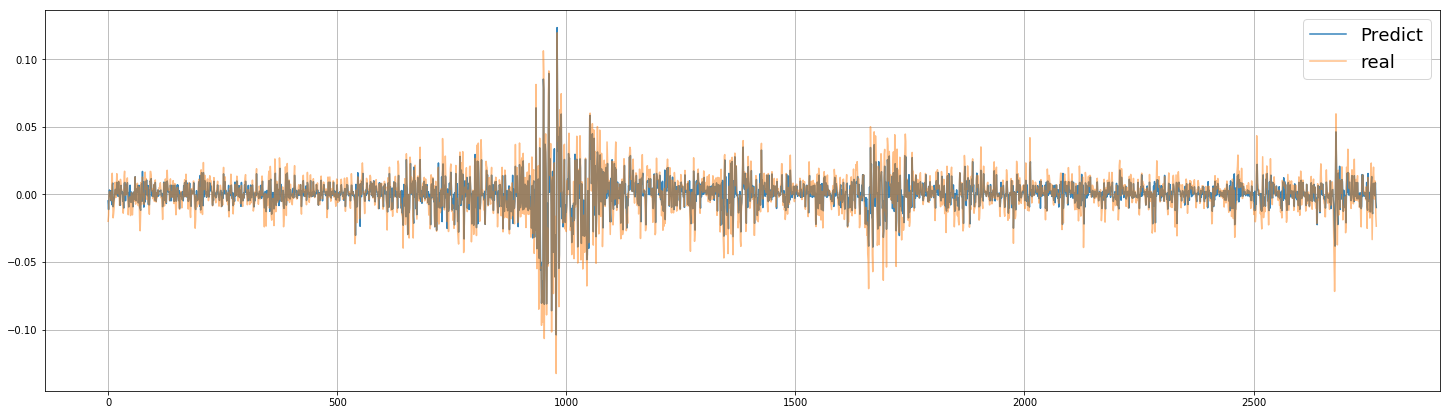

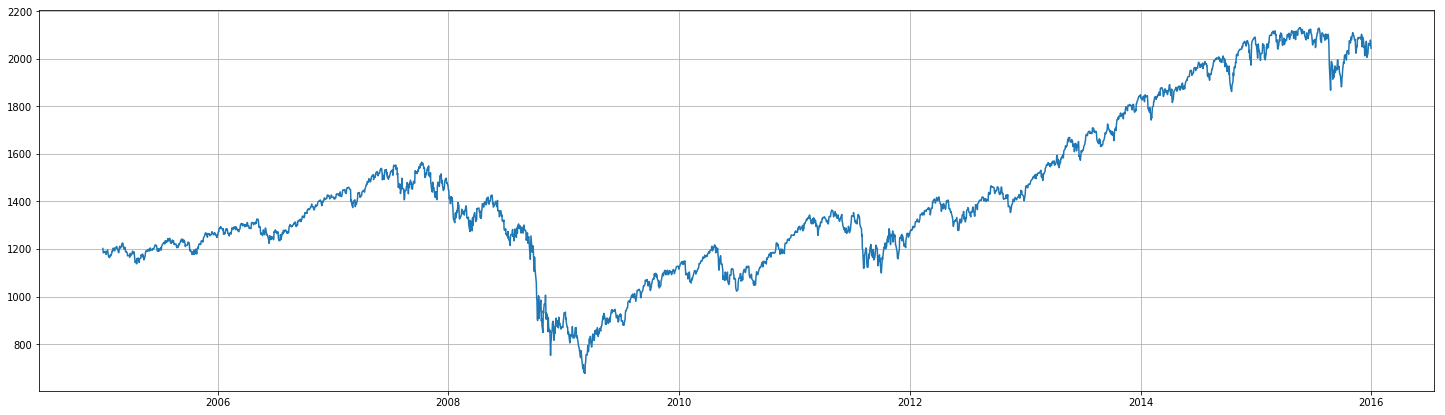

In [299]:
plt.figure(figsize=(25,7))
pred = xgb.predict(train_data)
plt.plot(pred, label='Predict', alpha=0.9)
plt.plot(train_label, label='real', alpha=0.5)
plt.grid(True)
plt.legend(fontsize=18)
plt.figure(figsize=(25,7))
plt.plot(train['Close'])
plt.grid(True)

In [296]:
sum(np.where(pred>0, 1, 0) == np.where(train_label.T>0, 1 , 0)) / len(pred)

0.7569519682195739

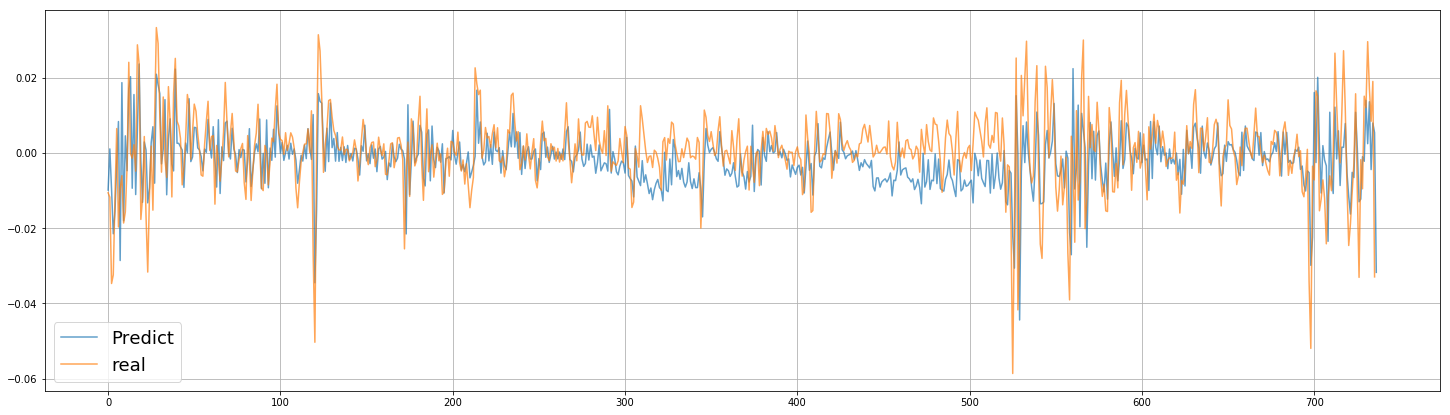

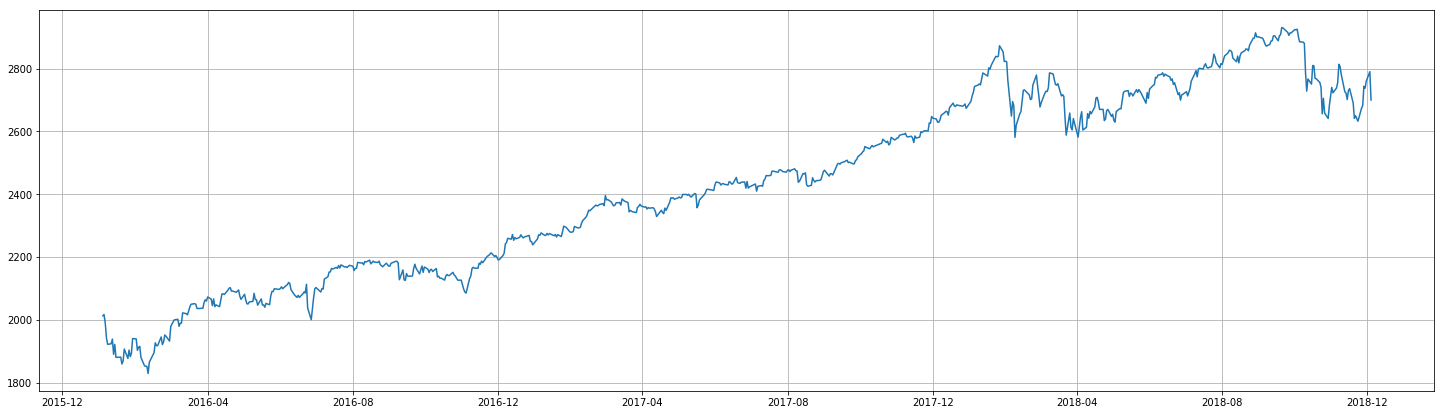

In [297]:
plt.figure(figsize=(25,7))
pred = xgb.predict(test_data)
plt.plot(pred, label='Predict', alpha=0.7)
plt.plot(test_label, label='real', alpha=0.7)
plt.grid(True)
plt.legend(fontsize=18)
plt.figure(figsize=(25,7))
plt.plot(test['Close'])
plt.grid(True)

In [255]:
sum(np.where(pred>0, 1, 0) == np.where(test_label.T>0, 1 , 0)) / len(pred)

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.6309362279511533

In [228]:
t = pd.Series(index = test.index)

In [307]:
sp500 = sp500.dropna()
sp500.iloc[252*5:252*10]

,Open,High,Low,Close,Volume,returnsCloseNext10,pct_change,close_ma_3,close_ma_5,close_ma_7,...,returnsCO10,returnsOC10,returnsCC12,returnsOO12,returnsCO12,returnsOC12,returnsCC14,returnsOO14,returnsCO14,returnsOC14
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-05,1288.160034,1288.160034,1264.660034,1265.290039,2.31347,-0.019052,-0.017800,1279.739990,1273.835986,1274.602853,...,0.016539,0.002754,-0.003967,-0.002768,0.013946,-0.020681,-0.022823,-0.002349,-0.004910,-0.020263
2006-06-06,1265.229980,1269.880005,1254.459961,1263.849976,2.69765,-0.007202,-0.001138,1272.453329,1274.631983,1273.312849,...,0.002501,-0.002513,0.001615,-0.003960,0.002707,-0.005051,-0.022091,-0.022871,-0.020999,-0.023962
2006-06-07,1263.609985,1272.469971,1255.770020,1256.150024,2.64417,-0.004505,-0.006092,1261.763346,1271.843994,1269.882847,...,0.005579,-0.004694,-0.008624,0.001425,-0.002703,-0.004496,-0.011217,-0.022010,-0.005296,-0.027931
2006-06-08,1256.079956,1259.849976,1235.180054,1257.930054,3.54379,-0.003014,0.001417,1259.310018,1266.288013,1269.605713,...,-0.001980,0.001090,-0.003286,-0.008680,-0.004757,-0.007208,-0.003080,-0.011218,-0.004552,-0.009746
2006-06-09,1257.930054,1262.579956,1250.030029,1252.300049,2.21400,-0.016423,-0.004476,1255.460042,1259.104028,1267.064296,...,-0.011814,-0.004867,-0.003412,-0.003278,0.001074,-0.007763,-0.011694,-0.003080,-0.007208,-0.007565
2006-06-12,1252.270020,1255.219971,1236.430054,1237.439941,2.24701,-0.023087,-0.011866,1249.223348,1253.534009,1260.168579,...,-0.022027,-0.028104,-0.016931,-0.003420,-0.005018,-0.015333,-0.019709,-0.011718,-0.007795,-0.023631
2006-06-13,1236.079956,1243.369995,1222.520020,1223.689941,3.21577,-0.004898,-0.011112,1237.809977,1245.502002,1250.950003,...,-0.019063,-0.045021,-0.039411,-0.017904,-0.029337,-0.027978,-0.026523,-0.020800,-0.016449,-0.030875
2006-06-14,1223.660034,1231.459961,1219.290039,1230.040039,2.66799,0.026213,0.005189,1230.389974,1240.280005,1245.914289,...,-0.037241,-0.023573,-0.039938,-0.039302,-0.045139,-0.034102,-0.022929,-0.026531,-0.028130,-0.021331
2006-06-15,1230.010010,1258.640015,1230.010010,1256.160034,2.77548,0.017353,0.021235,1236.630005,1239.926001,1244.815726,...,-0.044289,-0.010997,-0.002949,-0.039869,-0.023986,-0.018832,-0.013223,-0.022827,-0.034260,-0.001790


In [309]:
sp500.values[:,:4]

array([[1277.890015, 1278.420044, 1265.410034, 1267.930054],
       [1267.930054, 1267.930054, 1245.959961, 1248.079956],
       [1248.079956, 1261.910034, 1248.069946, 1255.819946],
       ...,
       [2736.969971, 2753.75    , 2722.939941, 2737.800049],
       [2737.76001 , 2760.879883, 2732.76001 , 2760.169922],
       [2790.5     , 2800.179932, 2773.379883, 2790.370117]])

In [311]:
sp500 = sp500.loc['2005-01-01':]

In [312]:
sp500

,Open,High,Low,Close,Volume,returnsCloseNext10,pct_change,close_ma_3,close_ma_5,close_ma_7,...,returnsCO10,returnsOC10,returnsCC12,returnsOO12,returnsCO12,returnsOC12,returnsCC14,returnsOO14,returnsCO14,returnsOC14
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1.51080,-0.019893,-0.008119,1209.183350,1210.908008,1209.941441,...,0.014729,-0.000940,-0.003024,0.007072,0.005129,-0.001081,0.002832,0.019935,0.010985,0.011782
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1.72100,-0.015374,-0.011671,1200.683350,1205.810010,1206.787162,...,0.006200,-0.005163,-0.012680,-0.003024,-0.000940,-0.014764,-0.012821,0.002832,-0.001081,-0.008908
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1.73890,-0.000135,-0.003628,1191.289998,1199.868018,1203.761440,...,-0.014540,-0.009174,-0.008798,-0.012680,-0.005163,-0.016314,-0.018398,-0.012821,-0.014764,-0.016455
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1.56910,0.002068,0.003506,1186.560018,1194.736011,1200.097151,...,-0.021586,-0.014674,-0.005675,-0.008798,-0.009174,-0.005298,-0.012814,-0.018398,-0.016314,-0.014898
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1.47790,0.001985,-0.001431,1185.939982,1189.589990,1196.202863,...,-0.018549,-0.019518,-0.016106,-0.005675,-0.014674,-0.007107,-0.006730,-0.012814,-0.005298,-0.014247
2005-01-10,1186.189941,1194.780029,1184.800049,1190.250000,1.49040,-0.002701,0.003423,1188.109985,1187.223999,1192.874285,...,-0.015667,-0.016564,-0.016102,-0.016106,-0.019518,-0.012690,-0.003690,-0.006730,-0.007107,-0.003313
2005-01-11,1190.250000,1190.250000,1180.430054,1182.989990,1.48880,-0.002145,-0.006100,1186.476644,1186.211987,1188.741420,...,-0.019378,-0.018368,-0.022683,-0.016102,-0.016564,-0.022220,-0.018808,-0.003690,-0.012690,-0.009808
2005-01-12,1182.989990,1187.920044,1175.640015,1187.699951,1.56210,-0.004694,0.003981,1186.979980,1187.003979,1186.687134,...,-0.025422,-0.021523,-0.014395,-0.022683,-0.018368,-0.018709,-0.018246,-0.018808,-0.022220,-0.014834
2005-01-13,1187.699951,1187.699951,1175.810059,1177.449951,1.51030,-0.002681,-0.008630,1182.713297,1184.915967,1185.172834,...,-0.021531,-0.030116,-0.030191,-0.014395,-0.021523,-0.023062,-0.027377,-0.018246,-0.018709,-0.026914


In [229]:
from sklearn.preprocessing import MinMaxScaler
def predict_next_day(df):
    minmax = MinMaxScaler()
    data = df.values[:,:4]
    smoothing_window_size = 250
    for di in range(0, 1000, smoothing_window_size):
        minmax.fit(data[di:di+smoothing_window_size,:])
        data[di:di+smoothing_window_size,:] = minmax.transform(data[di:di+smoothing_window_size,:])
    minmax.fit(data[di+smoothing_window_size:, :])
    data[di+smoothing_window_size:,:] = minmax.transform(data[di+smoothing_window_size:,:])
    

Date
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
2016-01-11   NaN
2016-01-12   NaN
2016-01-13   NaN
2016-01-14   NaN
2016-01-15   NaN
2016-01-19   NaN
2016-01-20   NaN
2016-01-21   NaN
2016-01-22   NaN
2016-01-25   NaN
2016-01-26   NaN
2016-01-27   NaN
2016-01-28   NaN
2016-01-29   NaN
2016-02-01   NaN
2016-02-02   NaN
2016-02-03   NaN
2016-02-04   NaN
2016-02-05   NaN
2016-02-08   NaN
2016-02-09   NaN
2016-02-10   NaN
2016-02-11   NaN
2016-02-12   NaN
2016-02-16   NaN
              ..
2018-10-23   NaN
2018-10-24   NaN
2018-10-25   NaN
2018-10-26   NaN
2018-10-29   NaN
2018-10-30   NaN
2018-10-31   NaN
2018-11-01   NaN
2018-11-02   NaN
2018-11-05   NaN
2018-11-06   NaN
2018-11-07   NaN
2018-11-08   NaN
2018-11-09   NaN
2018-11-12   NaN
2018-11-13   NaN
2018-11-14   NaN
2018-11-15   NaN
2018-11-16   NaN
2018-11-19   NaN
2018-11-20   NaN
2018-11-21   NaN
2018-11-23   NaN
2018-11-26   NaN
2018-11-27   NaN
2018-11-28   NaN
2018-11-29   NaN
2018-11-3

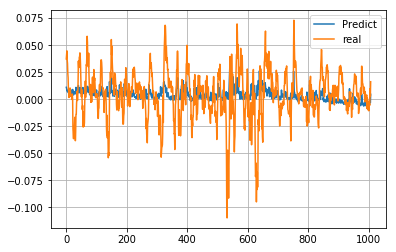

In [44]:
pred = lr.predict(train[['Close','Open','High','Low']])
plt.plot(pred, label='Predict')
plt.plot(train['returnsCloseNext10'].values, label='real')
plt.grid(True)
plt.legend()

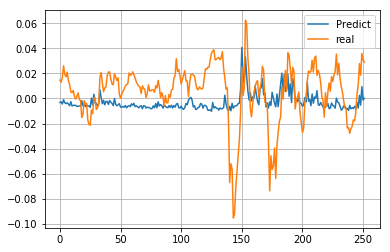

In [45]:
pred = lr.predict(test[['Close','Open','High','Low']])
plt.plot(pred, label='Predict')
plt.plot(test['returnsCloseNext10'].values, label='real')
plt.grid(True)
plt.legend()

In [143]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(train[['Close','Open','High','Low']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [144]:
train = pd.concat((train,
          pd.DataFrame(std.transform(train[['Close','Open','High','Low']]), 
                       columns=['close','open','high','low'], index=train.index)),
           axis=1)
test = pd.concat((test,
          pd.DataFrame(std.transform(test[['Close','Open','High','Low']]), 
                       columns=['close','open','high','low'], index=test.index)),
           axis=1)

In [146]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, penalty='l2', eta0=0.001)

In [147]:
sgd.fit(train[['close','open','high','low']].values, train['returnsCloseNext10'].values)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [148]:
sgd.intercept_

array([0.0038762])

In [149]:
sgd.coef_

array([-0.0031302 ,  0.00121574,  0.00379281, -0.00489854])

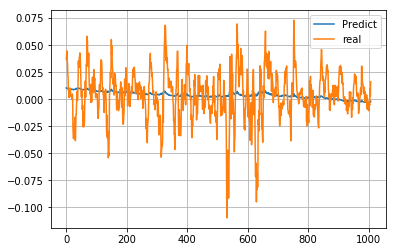

In [151]:
pred = sgd.predict(train[['close','open','high','low']])
plt.plot(pred, label='Predict')
plt.plot(train['returnsCloseNext10'].values, label='real')
plt.grid(True)
plt.legend()